In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[SnP500 Close]([https://lazyprogrammer.me/course_files/sp500_close.csv)

In [7]:
close = pd.read_csv('sp500_close.csv', index_col=0, parse_dates=True)

In [14]:
goog = close[['GOOG']].copy().dropna()

In [15]:
goog

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00
...,...
2018-02-01,1167.70
2018-02-02,1111.90
2018-02-05,1055.80
2018-02-06,1080.60


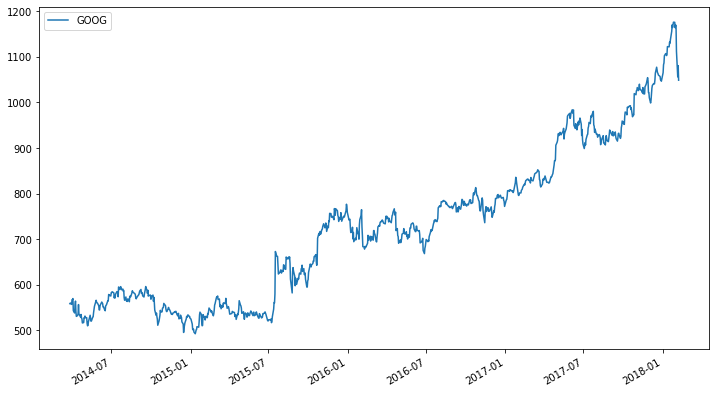

In [16]:
goog.plot(figsize=(12, 7));

Log Return в одну строку

In [25]:
goog['return'] = np.log(goog['GOOG'].pct_change(1) + 1)

Log Return через получения лог цены и разницы между ними

In [26]:
goog['log_price'] = np.log(goog['GOOG'])
goog['return_2'] = goog['log_price'] - goog['log_price'].shift(1)

In [27]:
goog

,GOOG,return,log_price,return_2
2014-03-27,558.46,NaN,6.325183,NaN
2014-03-28,559.99,0.002736,6.327919,0.002736
2014-03-31,556.97,-0.005408,6.322511,-0.005408
2014-04-01,567.16,0.018130,6.340641,0.018130
2014-04-02,567.00,-0.000282,6.340359,-0.000282
...,...,...,...,...
2018-02-01,1167.70,-0.001916,7.062791,-0.001916
2018-02-02,1111.90,-0.048966,7.013826,-0.048966
2018-02-05,1055.80,-0.051771,6.962054,-0.051771
2018-02-06,1080.60,0.023218,6.985272,0.023218


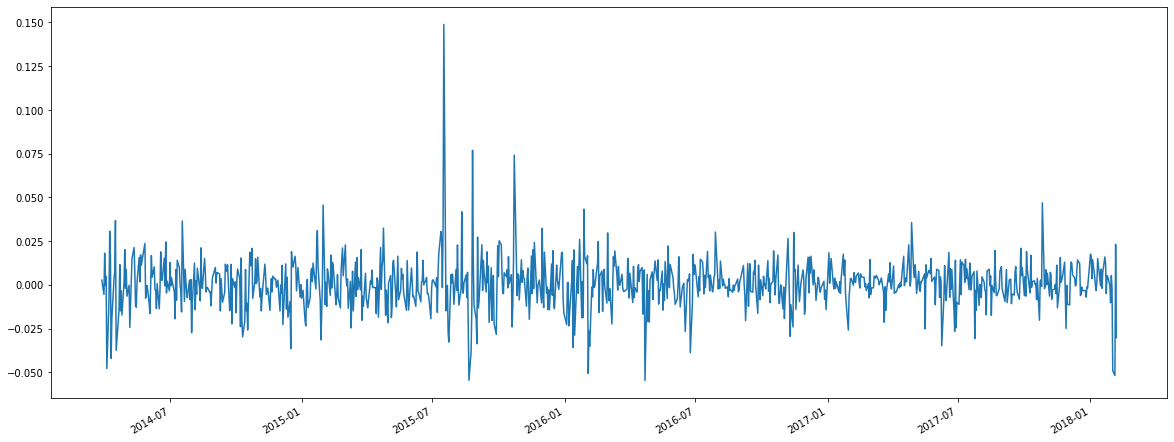

In [30]:
goog['return'].plot(figsize=(20, 8));

Calculate SMA

In [32]:
goog['SMA-10'] = goog['GOOG'].rolling(10).mean()
goog.head(15)

,GOOG,return,log_price,return_2,SMA-10
2014-03-27,558.46,NaN,6.325183,NaN,NaN
2014-03-28,559.99,0.002736,6.327919,0.002736,NaN
2014-03-31,556.97,-0.005408,6.322511,-0.005408,NaN
2014-04-01,567.16,0.018130,6.340641,0.018130,NaN
2014-04-02,567.00,-0.000282,6.340359,-0.000282,NaN
2014-04-03,569.74,0.004821,6.345180,0.004821,NaN
2014-04-04,543.14,-0.047813,6.297367,-0.047813,NaN
2014-04-07,538.15,-0.009230,6.288137,-0.009230,NaN
2014-04-08,554.90,0.030651,6.318788,0.030651,NaN
2014-04-09,564.14,0.016515,6.335302,0.016515,557.965


In [35]:
# тип объекта
type(goog['GOOG'].rolling(10))

pandas.core.window.rolling.Rolling

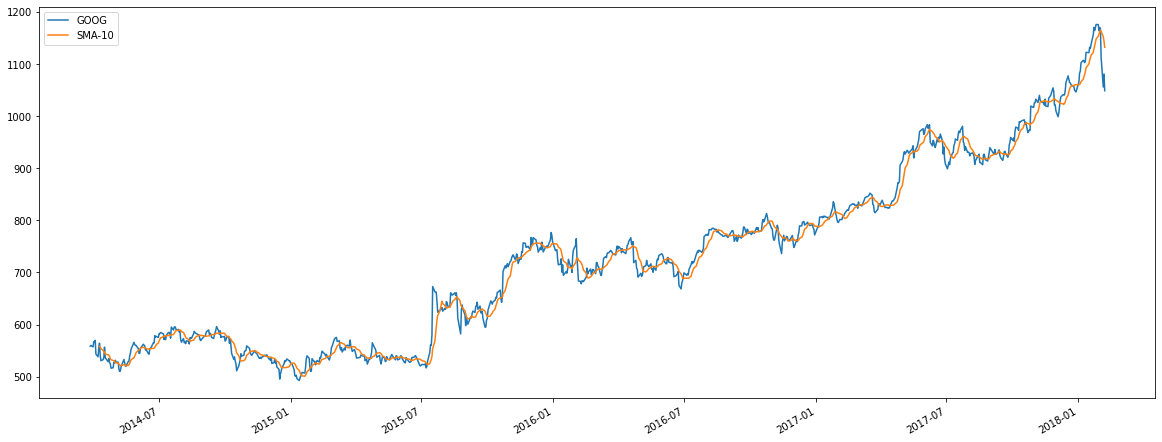

In [37]:
goog[['GOOG', 'SMA-10']].plot(figsize=(20, 8));

In [38]:
goog['SMA-50'] = goog['GOOG'].rolling(50).mean()

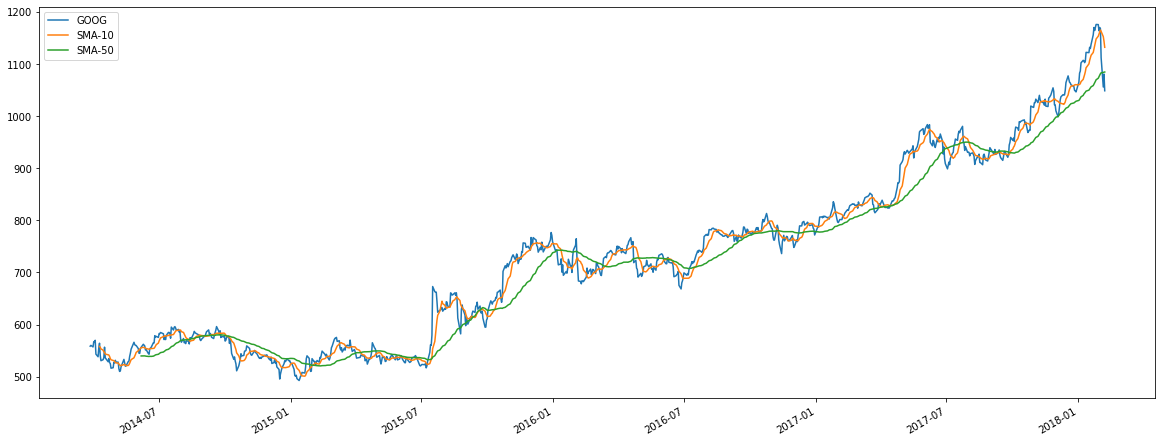

In [39]:
goog[['GOOG', 'SMA-10', 'SMA-50']].plot(figsize=(20, 8));